- Họ tên: Nguyễn Thị Mai Phương
- Mã số sinh viên: 19522064
- Môn: Phân Tích và Trực Quan Dữ Liệu
- Số thứ tự: 17
- Bài Thực Hành 6

# Câu 1: Load dữ liệu và xuất 5 sample đầu tiên

In [122]:
import pandas as pd 
import numpy as np
df=pd.read_excel('/content/drive/MyDrive/PHAN_TICH_VA_TRUC_QUAN_HOA_DATA/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

In [123]:
# xuất 5 sample đầu tiên
df.head(5)

Type    Coverage          OdName  AREA  ...  2010  2011  2012  2013
0  Immigrants  Foreigners     Afghanistan   935  ...  1758  2203  2635  2004
1  Immigrants  Foreigners         Albania   908  ...   561   539   620   603
2  Immigrants  Foreigners         Algeria   903  ...  4752  4325  3774  4331
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0     0
4  Immigrants  Foreigners         Andorra   908  ...     0     0     1     1

[5 rows x 43 columns]

# Câu 2: Đổi tên các column thành tên mới như: columns = {'OdName':'Country','AreaName':'Continent', 'RegName':'Region'}. Xóa các column ['AREA','REG', 'DEV','Type', 'Coverage'] 

In [124]:
# đổi tên cột
df.rename(columns={'OdName':'Country'}, inplace=True)
df.rename(columns={'AreaName':'Continent'}, inplace=True)
df.rename(columns={'RegName':'Region'}, inplace=True)
df.head()

Type    Coverage         Country  AREA  ...  2010  2011  2012  2013
0  Immigrants  Foreigners     Afghanistan   935  ...  1758  2203  2635  2004
1  Immigrants  Foreigners         Albania   908  ...   561   539   620   603
2  Immigrants  Foreigners         Algeria   903  ...  4752  4325  3774  4331
3  Immigrants  Foreigners  American Samoa   909  ...     0     0     0     0
4  Immigrants  Foreigners         Andorra   908  ...     0     0     1     1

[5 rows x 43 columns]

In [125]:
columns = ['AREA','REG', 'DEV','Type', 'Coverage']
df.drop(columns, axis =1, inplace=True)
df.head()

Country Continent           Region  ...  2011  2012  2013
0     Afghanistan      Asia    Southern Asia  ...  2203  2635  2004
1         Albania    Europe  Southern Europe  ...   539   620   603
2         Algeria    Africa  Northern Africa  ...  4325  3774  4331
3  American Samoa   Oceania        Polynesia  ...     0     0     0
4         Andorra    Europe  Southern Europe  ...     0     1     1

[5 rows x 38 columns]

# Câu 3: tạo thêm cột 'Total' trong dataset, lưu trữ tổng số từ năm 1980 đến 2013

In [126]:
df.shape

(195, 38)

In [127]:
df.iloc[:,4:38]

1980  1981  1982  1983  1984  1985  ...  2008  2009  2010  2011  2012  2013
0      16    39    39    47    71   340  ...  2111  1746  1758  2203  2635  2004
1       1     0     0     0     0     0  ...   560   716   561   539   620   603
2      80    67    71    69    63    44  ...  4005  5393  4752  4325  3774  4331
3       0     1     0     0     0     0  ...     0     0     0     0     0     0
4       0     0     0     0     0     0  ...     0     0     0     0     1     1
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
190  1191  1829  2162  3404  7583  5907  ...  1784  2171  1942  1723  1731  2112
191     0     0     0     0     0     0  ...     0     0     0     0     0     0
192     1     2     1     6     0    18  ...   133   128   211   160   174   217
193    11    17    11     7    16     9  ...    64    60   102    69    46    59
194    72   114   102    44    32    29  ...   611   508   494   434   437   407

[195 rows x 34 columns]

In [128]:
df['Total'] = df.iloc[:,4:38].sum(axis =1)

In [129]:
df.shape

(195, 39)

# Câu 4: Chuyển đổi các giá trị trong cột Country thành index của dòng

In [130]:
# chuyển 1 cột thành index
df = df.set_index('Country')

In [131]:
df.head()

Continent           Region  ...  2013  Total
Country                                    ...             
Afghanistan         Asia    Southern Asia  ...  2004  58639
Albania           Europe  Southern Europe  ...   603  15699
Algeria           Africa  Northern Africa  ...  4331  69439
American Samoa   Oceania        Polynesia  ...     0      6
Andorra           Europe  Southern Europe  ...     1     15

[5 rows x 38 columns]

# Câu 5: Gọi biến year lưu trữ thông tin các cột của các năm từ 1980 đến năm 2013 (years = [1980,1981, ...2013]. Thiết kế cách truy vấn trả về một dataframe với input là một country bất kỳ.

In [132]:
#years = list(map(str,range(1980, 2014)))
years = list(range(1980, 2014))
df.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

#df_top5 = df.head()
#df_top5 = df_top5[years].transpose()

In [133]:
df.head()

Continent  ...   Total
Country                                                       ...        
India                                                   Asia  ...  691904
China                                                   Asia  ...  659962
United Kingdom of Great Britain and Northern Ir...    Europe  ...  551500
Philippines                                             Asia  ...  511391
Pakistan                                                Asia  ...  241600

[5 rows x 38 columns]

In [134]:
df.loc['Haiti', years]

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

# Câu 6: tạo plot thể hiện số lượng di cư (sự biến động, diễn biến) của Haiti và Japan đến Canada từ năm 1980 đến 2013

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'unpper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


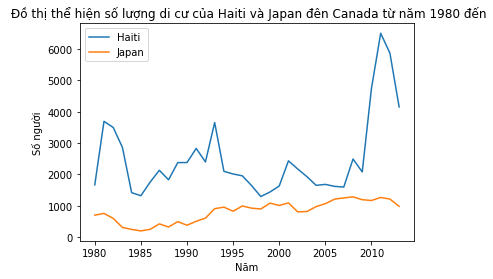

In [135]:
import matplotlib as mpl
import matplotlib.pyplot as plt

years = list(range(1980, 2014))
df_hati = df.loc['Haiti',years].plot(kind = 'line')
df_hati = df.loc['Japan',years].plot(kind = 'line')
plt.title(' Đồ thị thể hiện số lượng di cư của Haiti và Japan đên Canada từ năm 1980 đến')
plt.ylabel('Số người')
plt.xlabel('Năm')
plt.legend(['Haiti','Japan'], loc = 'unpper left')

# Câu 7: tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013

In [136]:
df_1 = df.sort_values(by = ['Total'], ascending = False)

In [140]:
df_top5 = df_1.head()
df_top5 = df_top5[years].transpose()

Text(0.5, 0, 'Năm')

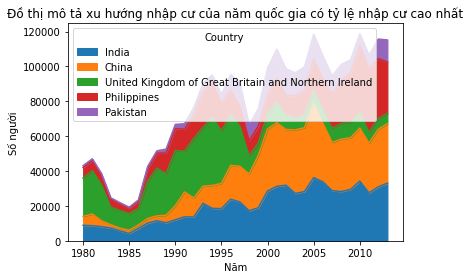

In [143]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_top5.plot(kind='area')
plt.title('Đồ thị mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất')
plt.ylabel('Số người')
plt.xlabel('Năm')

# Câu 8: tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013

In [144]:
df_tail5 = df_1.tail(5)
df_tail5 = df_tail5[years].transpose()

In [145]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_tail5.plot(kind='area')
plt.title('Đồ thị mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất')
plt.ylabel('Số người')
plt.xlabel('Năm')

Text(0.5, 0, 'Năm')

# Câu 9: tạo các plot thể hiện tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013. Nhận xét gì tần suất di cư đến Canada của các năm 

## 5 nước có tần số di cư cao nhất năm 2010,2011,2012

In [160]:
# top 5 nước dân cư cao nhất 2010
df_c10 = df.sort_values(by = [2010], ascending = False)
df_c10

Continent  ...   Total
Country                                                               ...        
Philippines                                                     Asia  ...  511391
India                                                           Asia  ...  691904
China                                                           Asia  ...  659962
United Kingdom of Great Britain and Northern Ir...            Europe  ...  551500
United States of America                            Northern America  ...  241122
...                                                              ...  ...     ...
Kiribati                                                     Oceania  ...      15
Nauru                                                        Oceania  ...      18
Canada                                              Northern America  ...      20
Liechtenstein                                                 Europe  ...      40
Palau                                                        Oceania  ...       1

[195 rows x 38 columns]

Text(0.5, 0, 'Number of Immigrants')

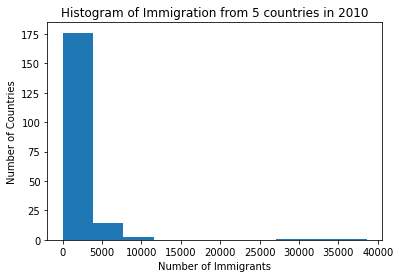

In [165]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

df_c10[2010].plot(kind = 'hist')
plt.title('Histogram of Immigration from 5 countries in 2010')
#plt.ylable('Number of Countries')
#plt.xlable('Number of Immigrants')
matplotlib.pyplot.ylabel('Number of Countries')
matplotlib.pyplot.xlabel('Number of Immigrants')





Text(0.5, 0, 'Number of Immigrants')

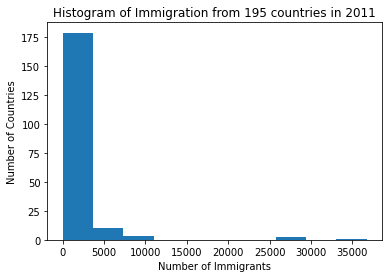

In [166]:
df_c10[2011].plot(kind = 'hist')
plt.title('Histogram of Immigration from 195 countries in 2011')
#plt.ylable('Number of Countries')
#plt.xlable('Number of Immigrants')
matplotlib.pyplot.ylabel('Number of Countries')
matplotlib.pyplot.xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

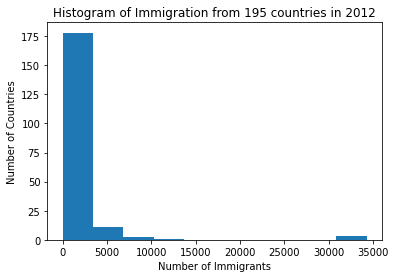

In [167]:
df_c10[2012].plot(kind = 'hist')
plt.title('Histogram of Immigration from 195 countries in 2012')
#plt.ylable('Number of Countries')
#plt.xlable('Number of Immigrants')
matplotlib.pyplot.ylabel('Number of Countries')
matplotlib.pyplot.xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

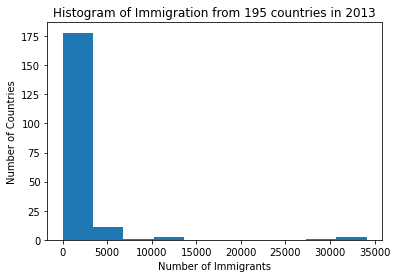

In [168]:
df_c10[2013].plot(kind = 'hist')
plt.title('Histogram of Immigration from 195 countries in 2013')
#plt.ylable('Number of Countries')
#plt.xlable('Number of Immigrants')
matplotlib.pyplot.ylabel('Number of Countries')
matplotlib.pyplot.xlabel('Number of Immigrants')

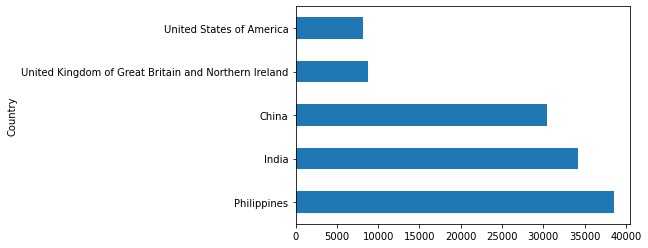

In [154]:
# tần suất di cư cao nhất của 5 quốc gia năm 2010
df_c10[2010].head(5).plot.barh()

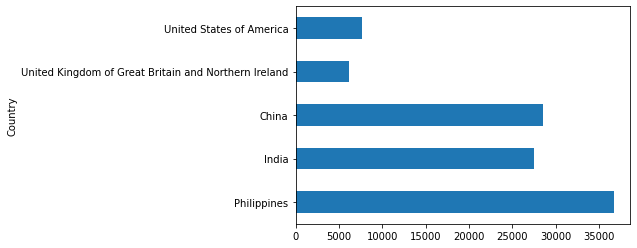

In [162]:
# tần suất di cư cao nhất của 5 quốc gia năm 2011
df_c10[2011].head(5).plot.barh()

In [163]:
# tần suất di cư cao nhất của 5 quốc gia năm 2012
df_c10[2012].head(5).plot.barh()

In [164]:
# tần suất di cư cao nhất của 5 quốc gia năm 2013
df_c10[2013].head(5).plot.barh()

-> Ta thấy được trong những năm 2010, 2011, 2012, 2013 tần suất di cư của 3 nước Philippines, Inđia, China là có tần suất cao nhất

# Câu 10: tạo các plot thể hiện tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013

In [169]:
df.head()

Continent  ...   Total
Country                                                       ...        
India                                                   Asia  ...  691904
China                                                   Asia  ...  659962
United Kingdom of Great Britain and Northern Ir...    Europe  ...  551500
Philippines                                             Asia  ...  511391
Pakistan                                                Asia  ...  241600

[5 rows x 38 columns]

In [172]:
df_continents = df.groupby('Continent', axis = 0).sum()
df_continents.head()

1980   1981   1982  ...    2012    2013    Total
Continent                                             ...                         
Africa                            3951   4363   3819  ...   38083   38543   618948
Asia                             31025  34314  30214  ...  152218  155075  3317794
Europe                           39760  44802  42720  ...   29177   28691  1410947
Latin America and the Caribbean  13081  15215  16769  ...   27173   24950   765148
Northern America                  9378  10030   9074  ...    7892    8503   241142

[5 rows x 35 columns]

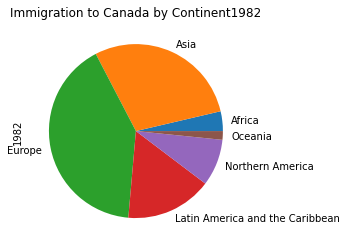

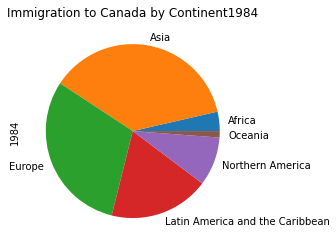

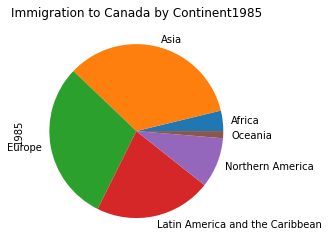

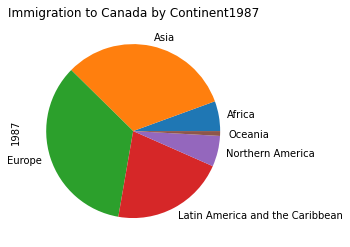

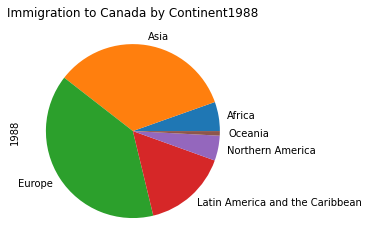

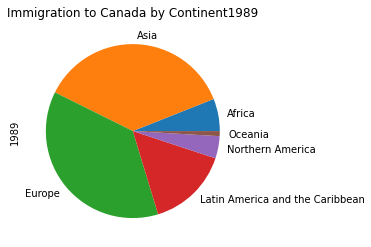

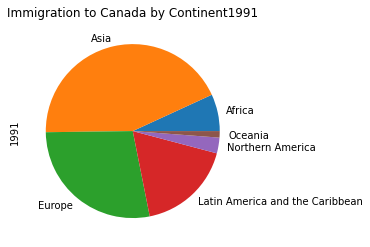

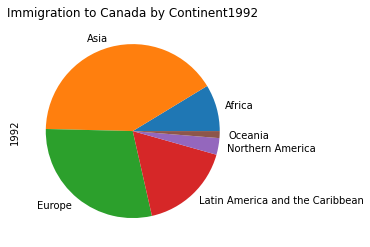

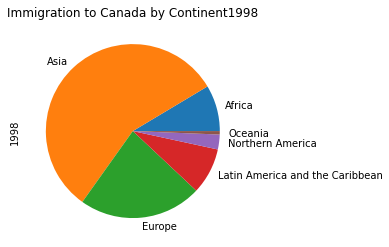

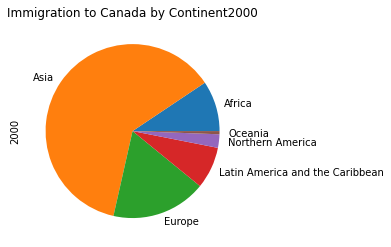

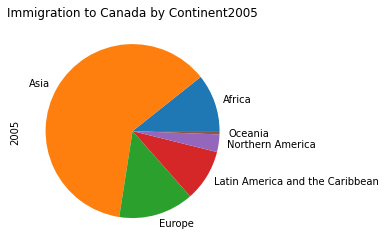

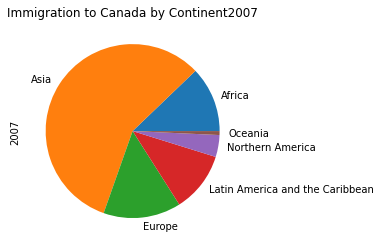

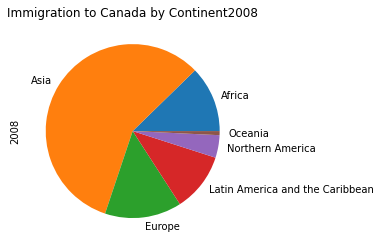

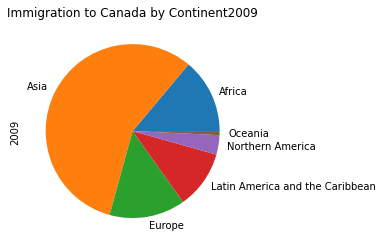

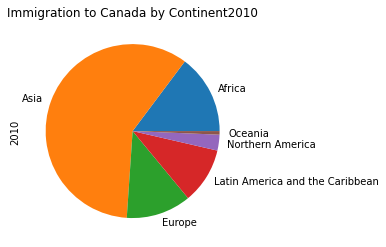

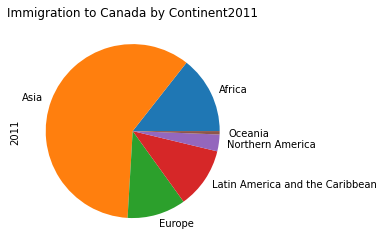

In [173]:
for i in range(34):
    title = 1980 + i
    df_continents.iloc[:,i].plot(kind = 'pie')
    plt.title('Immigration to Canada by Continent' + str(title))
    plt.show()